## 오버피팅 ( Overfitting ) 개선하기

과적합(오버피팅)은 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말함.
고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다.
결국 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우 성능의 저하가 우려됨.

이러한 문제점을 개선하기 위해 필요한 것이 ""교차검증"" 이라고 함.

### k폴드 교차 검증 

k 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법. k개의 데이터 폴드 세트를 만들어서 k번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행. 

sklearn에서는 k 폴드 교차 검증 프로세스를 구현하기 위해 KFold 와 StratifiedKFold 클래스를 제공.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=16)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.

kfold = KFold(n_splits=5)
cv_accuracy = []

print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [7]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 데이터 추출 
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    #반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기 :{2}, 검증 데이터 크기 :{3}'.
         format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    
    cv_accuracy.append(accuracy)
    
# 개별 iteration 별 정확도를 합하여 평균 정확도 계산 

print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :1.0, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9066599999999999


In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(223.2, 391.392, 'X[3] <= 0.8\ngini = 0.625\nsamples = 120\nvalue = [50, 50, 20]'),
 Text(167.39999999999998, 304.416, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(279.0, 304.416, 'X[2] <= 4.95\ngini = 0.408\nsamples = 70\nvalue = [0, 50, 20]'),
 Text(111.6, 217.44, 'X[3] <= 1.65\ngini = 0.04\nsamples = 49\nvalue = [0, 48, 1]'),
 Text(55.8, 130.464, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(167.39999999999998, 130.464, 'X[3] <= 1.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(111.6, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.2, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 217.44, 'X[3] <= 1.75\ngini = 0.172\nsamples = 21\nvalue = [0, 2, 19]'),
 Text(390.59999999999997, 130.464, 'X[1] <= 2.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(334.79999999999995, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(502.2, 130.46

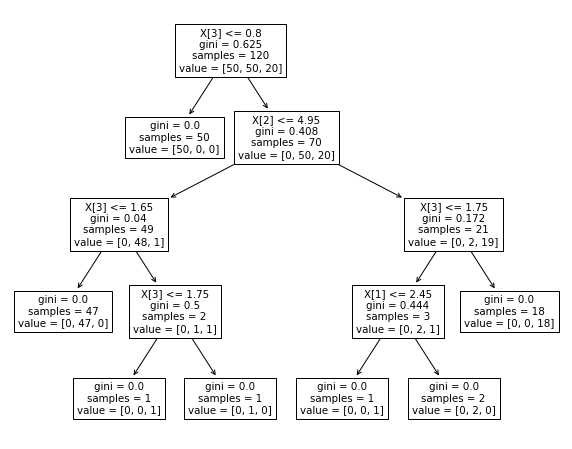

In [15]:
plt.figure(figsize=(10,8))
tree.plot_tree(dt_clf)